Portfolio Optimization
“Modern Portfolio Theory (MPT), a hypothesis put forth by Harry Markowitz in his paper “Portfolio Selection,” (published in 1952 by the Journal of Finance) is an investment theory based on the idea that risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. It is one of the most important and influential economic theories dealing with finance and investment.

Monte Carlo Simulation for Optimization Search
We could randomly try to find the optimal portfolio balance using Monte Carlo simulation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime

## Import the data

In [6]:
#define our start and end date
start=datetime.datetime(2020,1,1)
end=datetime.datetime(2021,2,21)

In [7]:
apple=web.DataReader('AAPL','yahoo', start,end)
cisco=web.DataReader('CSCO','yahoo', start,end)
ibm=web.DataReader('IBM','yahoo', start,end)
amzn=web.DataReader('AMZN','yahoo', start,end)

In [8]:
apple.index = pd.to_datetime(apple.index)
cisco.index = pd.to_datetime(cisco.index)
ibm.index = pd.to_datetime(ibm.index)
amzn.index = pd.to_datetime(amzn.index)


## Concatenate the close prices

In [11]:
stocks = pd.concat([apple['Close'],cisco['Close'],ibm['Close'],amzn['Close']],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn']

In [12]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2020-01-02,75.087502,48.419998,135.419998,1898.010010
2020-01-03,74.357498,47.630001,134.339996,1874.969971
2020-01-06,74.949997,47.799999,134.100006,1902.880005
2020-01-07,74.597504,47.490002,134.190002,1906.859985
2020-01-08,75.797501,47.520000,135.309998,1891.969971


In [13]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

aapl     0.002328
cisco    0.000111
ibm     -0.000132
amzn     0.002163
dtype: float64

In [14]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.645755,0.540763,0.691892
cisco,0.645755,1.000000,0.720559,0.482418
ibm,0.540763,0.720559,1.000000,0.400761
amzn,0.691892,0.482418,0.400761,1.000000


## Simulating Thousands of Possible Allocations

In [15]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2020-01-02,75.087502,48.419998,135.419998,1898.010010
2020-01-03,74.357498,47.630001,134.339996,1874.969971
2020-01-06,74.949997,47.799999,134.100006,1902.880005
2020-01-07,74.597504,47.490002,134.190002,1906.859985
2020-01-08,75.797501,47.520000,135.309998,1891.969971


<AxesSubplot:xlabel='Date'>

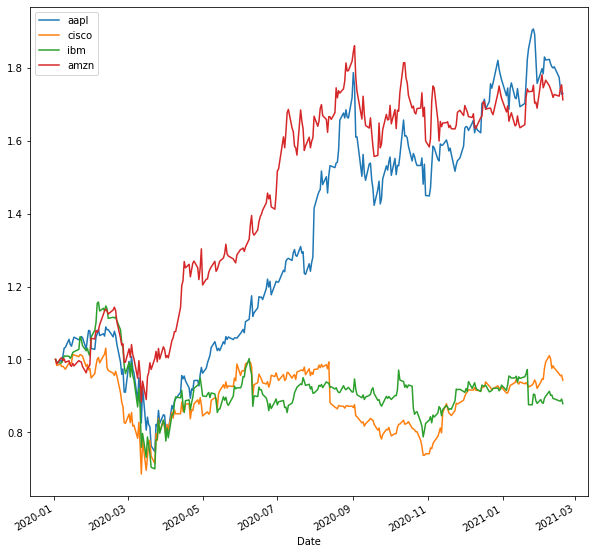

In [19]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot(figsize=(10,10))

In [20]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.009722,-0.016316,-0.007975,-0.012139
2020-01-06,0.007968,0.003569,-0.001786,0.014886
2020-01-07,-0.004703,-0.006485,0.000671,0.002092
2020-01-08,0.016086,0.000632,0.008346,-0.007809


## Log Returns vs Arithmetic Returns
We will now switch over to using log returns instead of arithmetic returns, for many of our use cases they are almost the same,but most technical analyses require detrending/normalizing the time series and using log returns is a nice way to do that. Log returns are convenient to work with in many of the algorithms we will encounter.

In [21]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.016450,-0.008007,-0.012213
2020-01-06,0.007937,0.003563,-0.001788,0.014776
2020-01-07,-0.004714,-0.006506,0.000671,0.002089
2020-01-08,0.015958,0.000631,0.008312,-0.007839


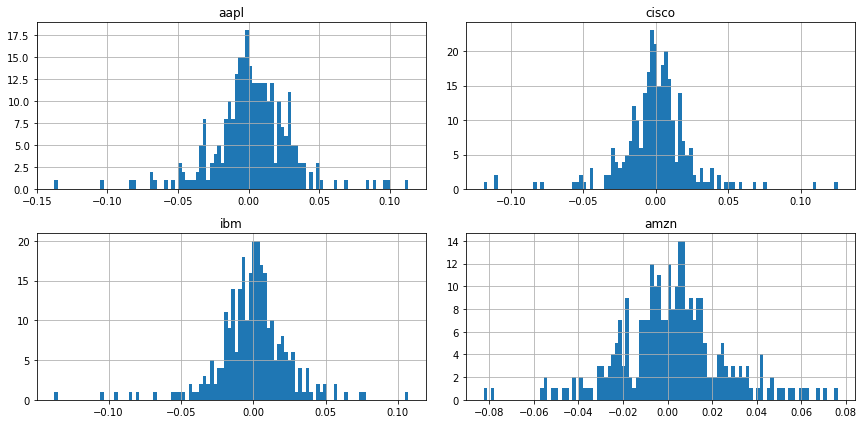

In [22]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [23]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
aapl,285.0,0.001922,0.028463,-0.137708,-0.011018,0.001233,0.016385,0.113157
cisco,285.0,-0.000204,0.025197,-0.118615,-0.009435,0.000000,0.010448,0.125517
ibm,285.0,-0.000454,0.025485,-0.137548,-0.012168,0.000081,0.011010,0.107069
amzn,285.0,0.001887,0.023426,-0.082535,-0.010019,0.002124,0.013532,0.076308


In [24]:
log_ret.mean() * 252

aapl     0.484441
cisco   -0.051507
ibm     -0.114365
amzn     0.475545
dtype: float64

In [25]:
# Compute pairwise covariance of columns
log_ret.cov()

,aapl,cisco,ibm,amzn
aapl,0.000810,0.000463,0.000395,0.000465
cisco,0.000463,0.000635,0.000462,0.000287
ibm,0.000395,0.000462,0.000650,0.000242
amzn,0.000465,0.000287,0.000242,0.000549


In [26]:
log_ret.cov()*252 # multiply by days

,aapl,cisco,ibm,amzn
aapl,0.204160,0.116605,0.099436,0.117134
cisco,0.116605,0.159991,0.116520,0.072377
ibm,0.099436,0.116520,0.163675,0.061029
amzn,0.117134,0.072377,0.061029,0.138286


## Single Run for Some Random Allocation

In [27]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
0.23237485466149255


Expected Volatility
0.36583124459373684


Sharpe Ratio
0.6351968512682661


In [28]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [29]:
sharpe_arr.max()

1.2792367626695993

In [30]:
sharpe_arr.argmax()

2082

In [31]:
all_weights[1419,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [32]:
max_sr_ret = ret_arr[1419]
max_sr_vol = vol_arr[1419]

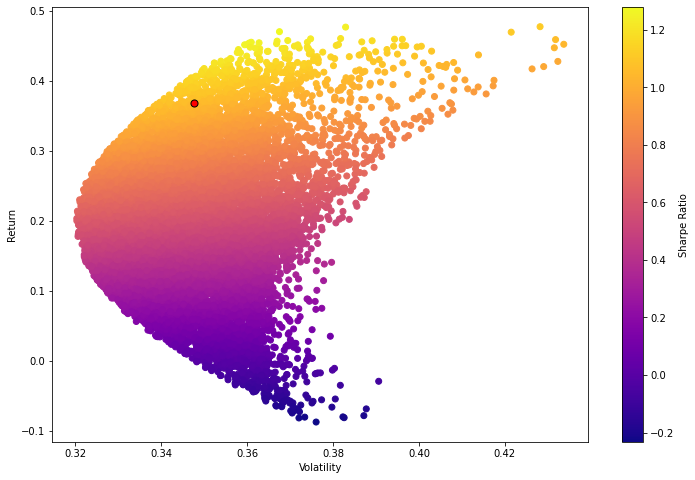

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

## Mathematical Optimization
There are much better ways to find good allocation weights than just guess and check! We can use optimization functions to find the ideal weights mathematically!

In [34]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [35]:
from scipy.optimize import minimize

In [36]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [37]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [38]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [39]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [40]:
# Initial Guess (equal distribution)
init_guess = [0.25,0.25,0.25,0.25]

In [41]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [42]:
opt_results

     fun: -1.3033921937695023
     jac: array([ 1.03160739e-04,  9.37466860e-01,  9.86472815e-01, -2.89082527e-05])
 message: 'Optimization terminated successfully'
    nfev: 25
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([2.18773721e-01, 2.54570670e-16, 2.02962647e-16, 7.81226279e-01])

In [43]:
opt_results.x

array([2.18773721e-01, 2.54570670e-16, 2.02962647e-16, 7.81226279e-01])

In [44]:
get_ret_vol_sr(opt_results.x)

array([0.47749086, 0.36634473, 1.30339219])

## All Optimal Portfolios (Efficient Frontier)
The efficient frontier is the set of optimal portfolios that offers the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal, because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are also sub-optimal, because they have a higher level of risk for the defined rate of return.

In [45]:
# Our returns go from 0 to somewhere along 0.3
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0,0.3,100) # Change 100 to a lower number for slower computers!

In [47]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [48]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

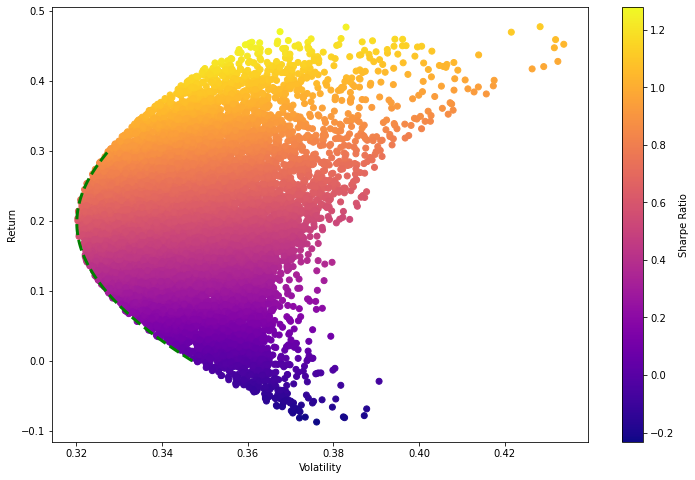

In [49]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)